Mean Squared Error: 1.0079
R² Score: 0.0355


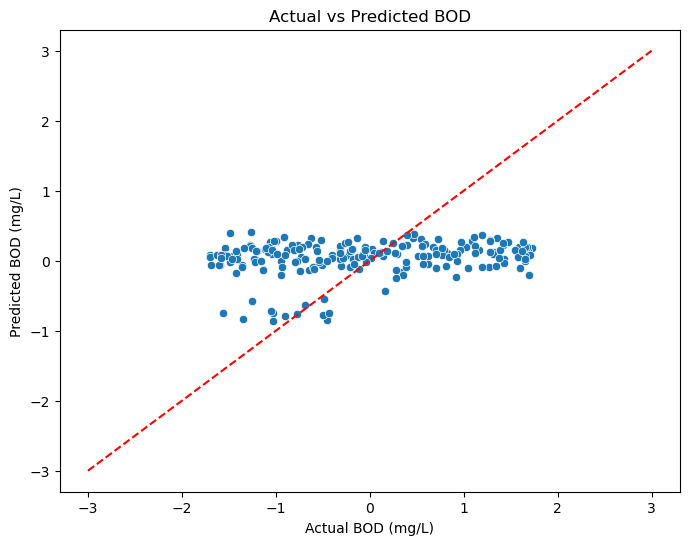

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "Water_Quality_Dataset.csv"
data = pd.read_csv(file_path)

data['Timestamp'] = pd.to_datetime(data['Timestamp'])

data = data.fillna(data.mean(numeric_only=True))

data['Location'] = data['Location'].astype('category').cat.codes

scaler = StandardScaler()
numerical_cols = ['pH', 'Turbidity (NTU)', 'Temperature (°C)', 
                  'DO (mg/L)', 'BOD (mg/L)', 
                  'Lead (mg/L)', 'Mercury (mg/L)', 'Arsenic (mg/L)']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

X = data.drop(['BOD (mg/L)', 'Timestamp'], axis=1)  
y = data['BOD (mg/L)']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual BOD (mg/L)")
plt.ylabel("Predicted BOD (mg/L)")
plt.title("Actual vs Predicted BOD")
plt.plot([-3,3], [-3,3], '--r')  
plt.show()
